In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [2]:
train_data = pd.read_csv('kaggle_data/train-spaceship.csv')
test_data = pd.read_csv('kaggle_data/test-spaceship.csv')

In [3]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
train_data = train_data.drop('PassengerId', axis=1)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(6)
memory usage: 823.6+ KB


In [6]:
train_data.isna().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [7]:
train_data = train_data.drop('Name', axis=1)

In [8]:
categorical_data = train_data.select_dtypes(include='object')
numerical_data = train_data.select_dtypes(include='number')

In [9]:
for col in train_data.columns:
    print(train_data[col].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

HomePlanet
Earth     54.2%
Europa    25.1%
Mars      20.7%
Name: proportion, dtype: object
CryoSleep
False    64.2%
True     35.8%
Name: proportion, dtype: object
Cabin
G/734/S     0.1%
G/109/P     0.1%
B/201/P     0.1%
G/1368/P    0.1%
G/981/S     0.1%
            ... 
G/556/P     0.0%
E/231/S     0.0%
G/545/S     0.0%
G/543/S     0.0%
F/947/P     0.0%
Name: proportion, Length: 6560, dtype: object
Destination
TRAPPIST-1e      69.5%
55 Cancri e      21.1%
PSO J318.5-22     9.4%
Name: proportion, dtype: object
Age
24.0    3.8%
18.0    3.8%
21.0    3.7%
19.0    3.4%
23.0    3.4%
        ... 
72.0    0.0%
78.0    0.0%
79.0    0.0%
76.0    0.0%
77.0    0.0%
Name: proportion, Length: 80, dtype: object
VIP
False    97.7%
True      2.3%
Name: proportion, dtype: object
RoomService
0.0       65.5%
1.0        1.4%
2.0        0.9%
3.0        0.7%
4.0        0.6%
          ...  
1612.0     0.0%
2598.0     0.0%
632.0      0.0%
378.0      0.0%
745.0      0.0%
Name: proportion, Length: 1273, dtype: o

In [10]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


### Missing Values

In [11]:
for col in train_data.columns:
    if train_data[col].dtype == 'object':
        train_data[col] = train_data[col].fillna(train_data[col].mode()[0])
    else:
        train_data[col] = train_data[col].fillna(train_data[col].mean())

C:\Users\Dell\AppData\Local\Temp\ipykernel_15468\1395387562.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data[col] = train_data[col].fillna(train_data[col].mode()[0])


In [12]:
train_data.isna().sum()

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   bool   
 2   Cabin         8693 non-null   object 
 3   Destination   8693 non-null   object 
 4   Age           8693 non-null   float64
 5   VIP           8693 non-null   bool   
 6   RoomService   8693 non-null   float64
 7   FoodCourt     8693 non-null   float64
 8   ShoppingMall  8693 non-null   float64
 9   Spa           8693 non-null   float64
 10  VRDeck        8693 non-null   float64
 11  Transported   8693 non-null   bool   
dtypes: bool(3), float64(6), object(3)
memory usage: 636.8+ KB


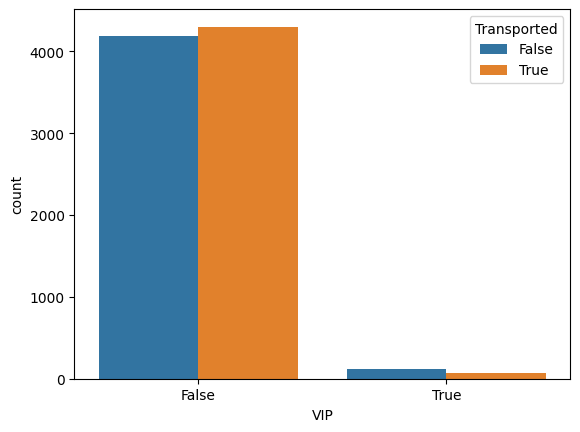

In [15]:
sns.countplot(x='VIP', hue='Transported', data=train_data)
plt.show()

In [20]:
contingency_table = pd.crosstab(train_data['VIP'], train_data['Transported'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print('Independence between VIP and Transported')
print(f'p-value: {p}')

Independence between VIP and Transported
p-value: 0.0006681023600149099


In [21]:
train_data = train_data.drop('VIP', axis=1)

In [22]:
def plot_pie_charts(data):
    for col in data.columns:
        if data[col].dtype == 'object' and data[col].nunique() < 10:
            value_counts = data[col].value_counts()
            plt.figure(figsize=(6,6))  # Set the size of the pie chart
            plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
            plt.title(f'{col} Value Counts')
            plt.show()

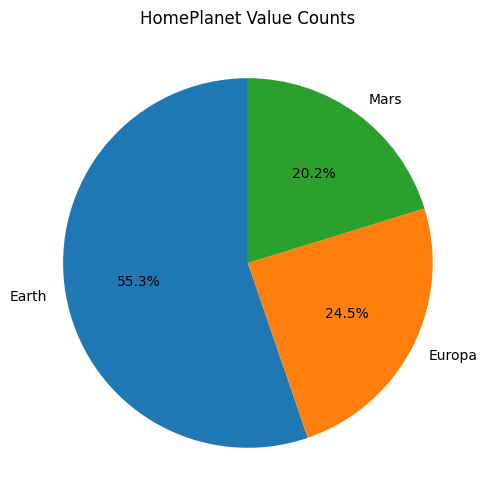

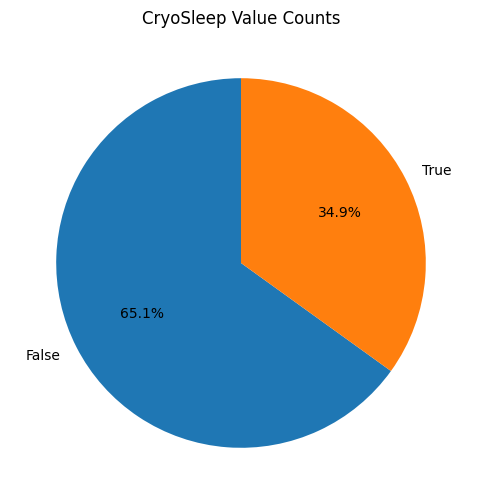

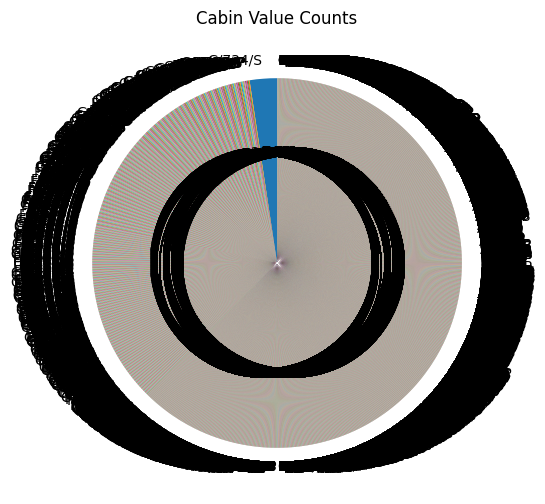

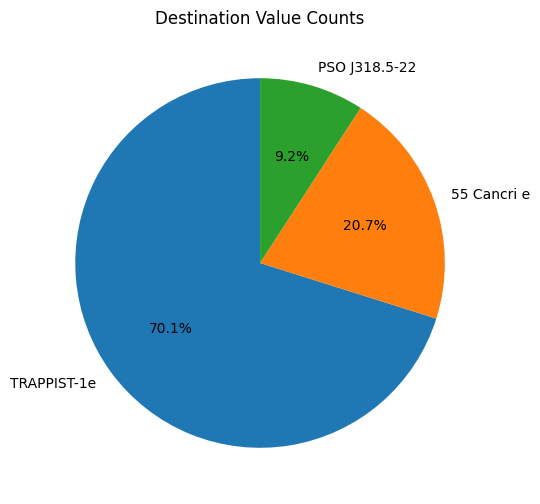

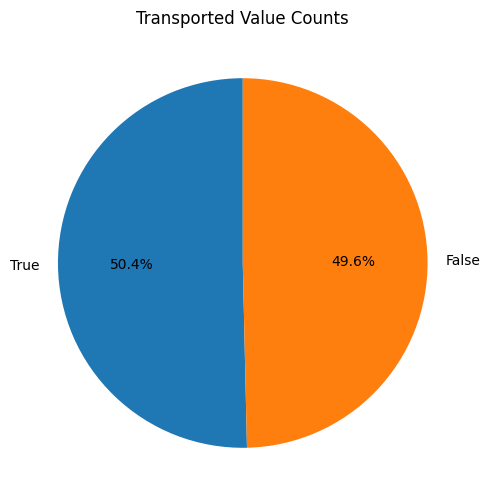

In [23]:
plot_pie_charts(train_data)